In [0]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from numpy import random
from astropy.visualization import make_lupton_rgb

In [0]:
img = cv2.imread('circles.jpg')

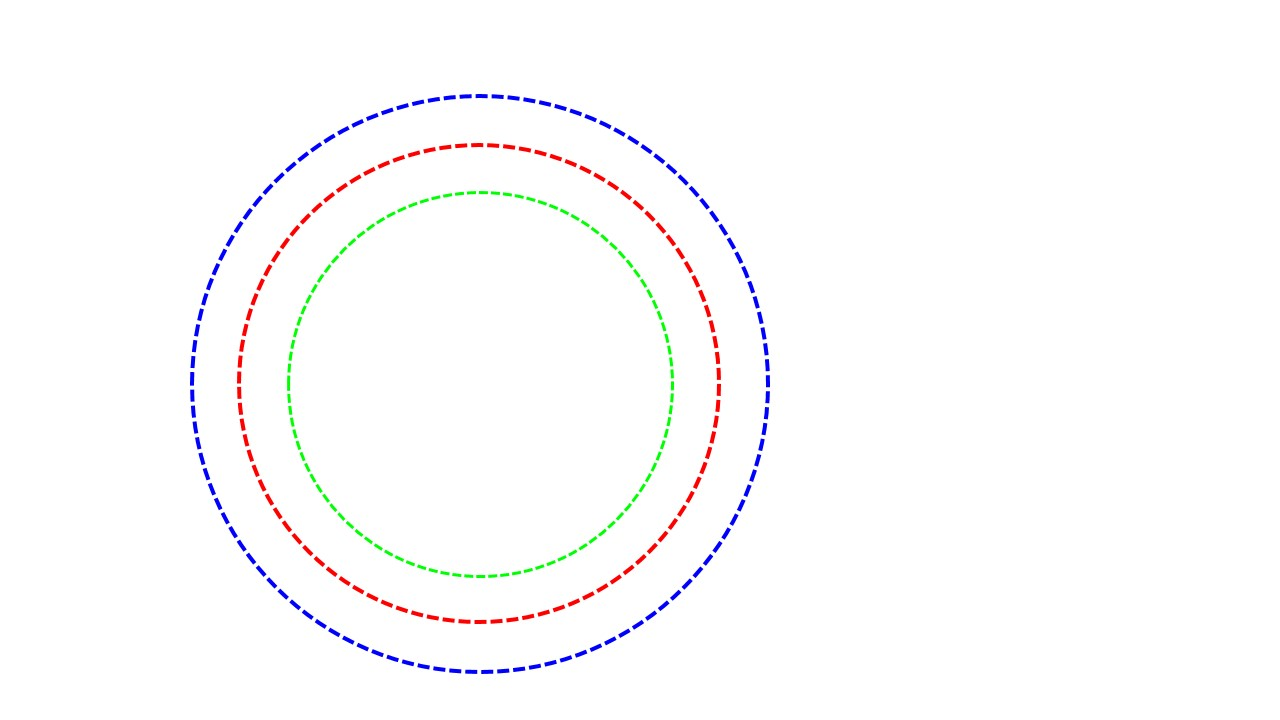

In [0]:
cv2_imshow(img)

In [0]:
print(img.shape)


(720, 1280, 3)


# BGR 0 = Black(Least Intensity)  255 = White (Most Intensity)

# Just a Try1

BLUE


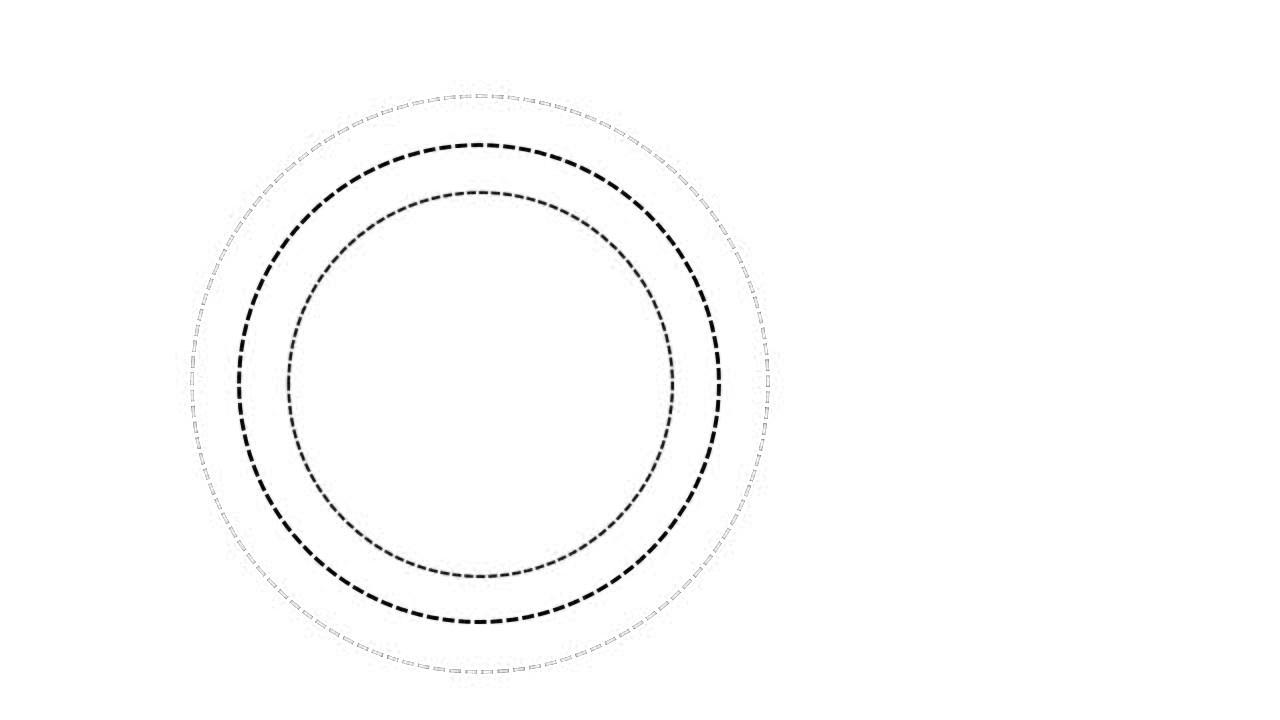

GREEN


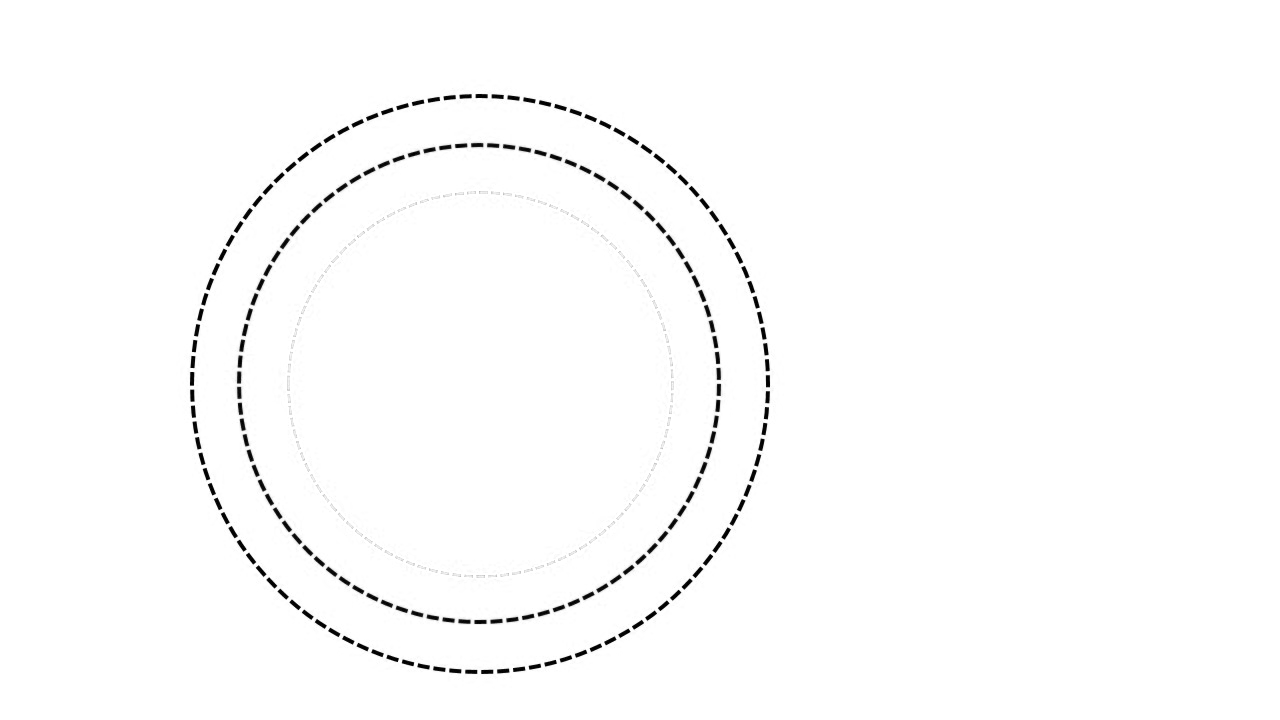

RED


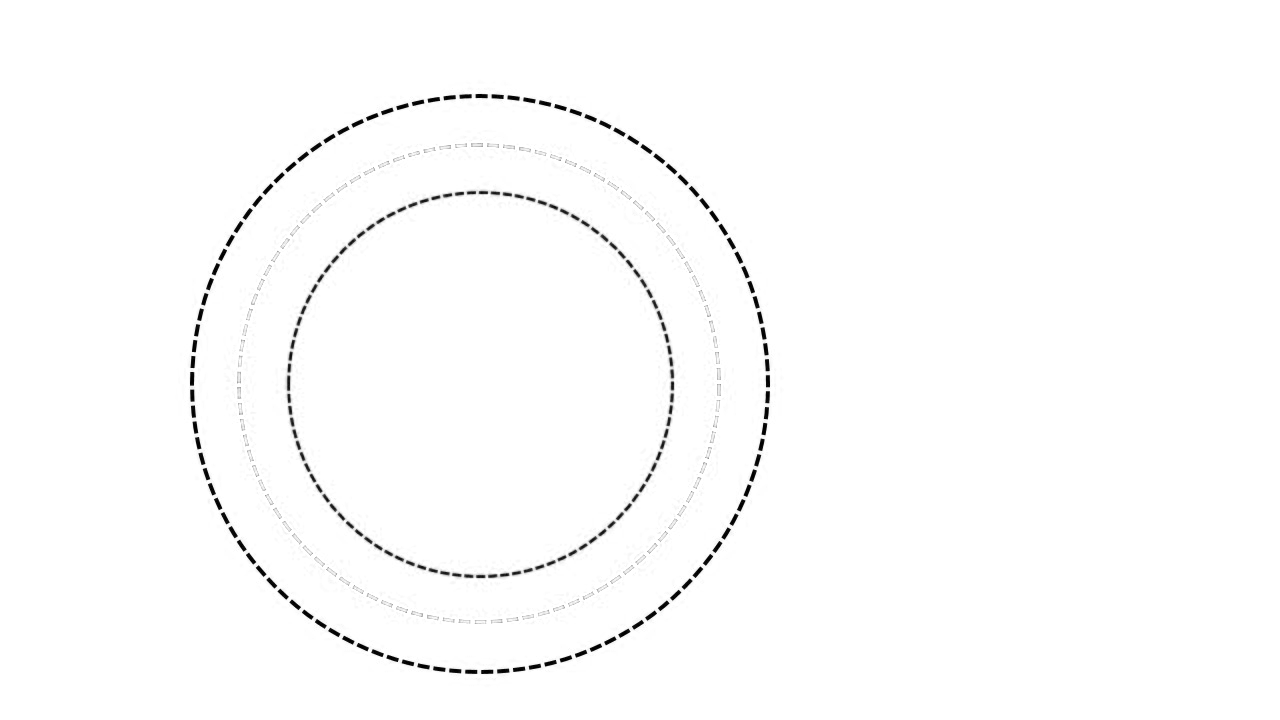

In [0]:
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]
print('BLUE')
cv2_imshow(B)
print('GREEN')
cv2_imshow(G)
print('RED')
cv2_imshow(R)

In [0]:
kernel_blue = np.array([[1,0,0],[0,0,0],[0,0,0]])
kernel_blue

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [0]:
kernel_blue = np.expand_dims(kernel_blue, axis=0)
kernel_blue.shape

(1, 3, 3)

In [0]:
temp = ndimage.convolve(img,kernel_blue)

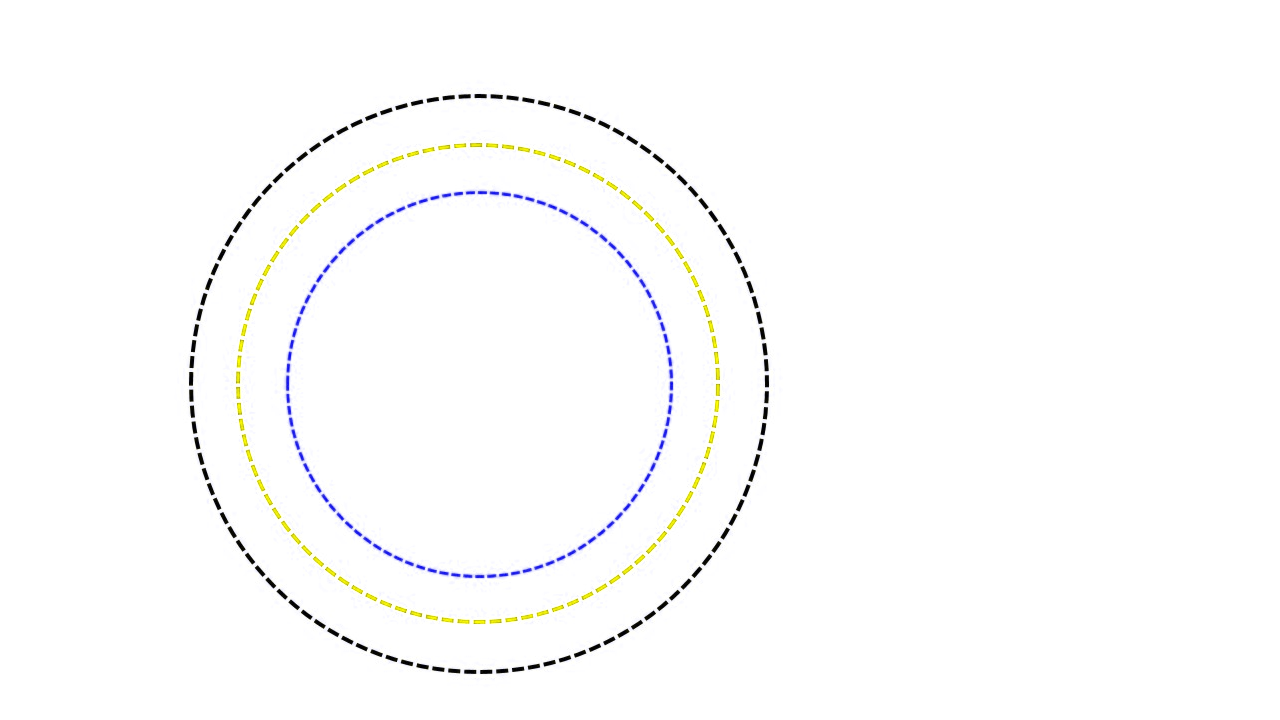

In [0]:
cv2_imshow(temp)

# Using Open CV DOC

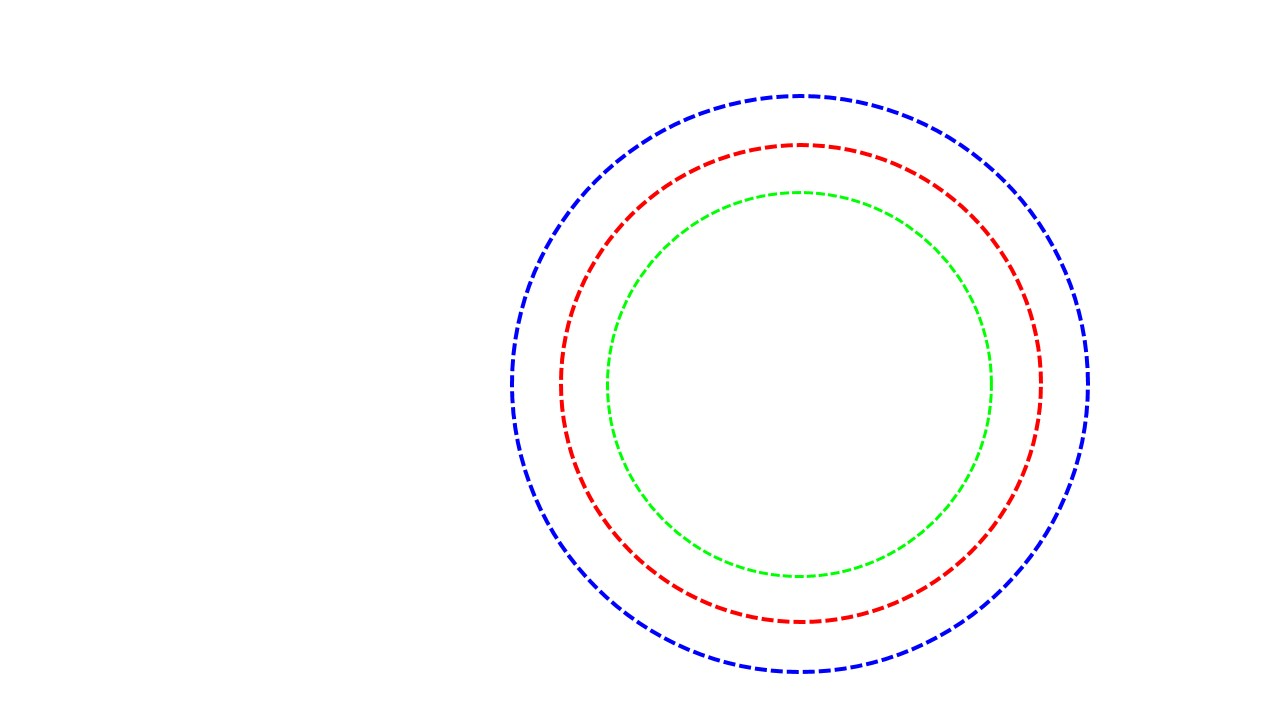

In [0]:

# Laterally invert the image / flip the image
img_new  = np.flip(img,axis=1)
 
cv2_imshow(img_new)

    Hue : This channel encodes color information. Hue can be thought of an angle where 0 degree corresponds to the red color, 120 degrees corresponds to the green color, and 240 degrees corresponds to the blue color.
    
    Saturation : This channel encodes the intensity/purity of color. For example, pink is less saturated than red.
    
    Value : This channel encodes the brightness of color. Shading and gloss components of an image appear in this channel.

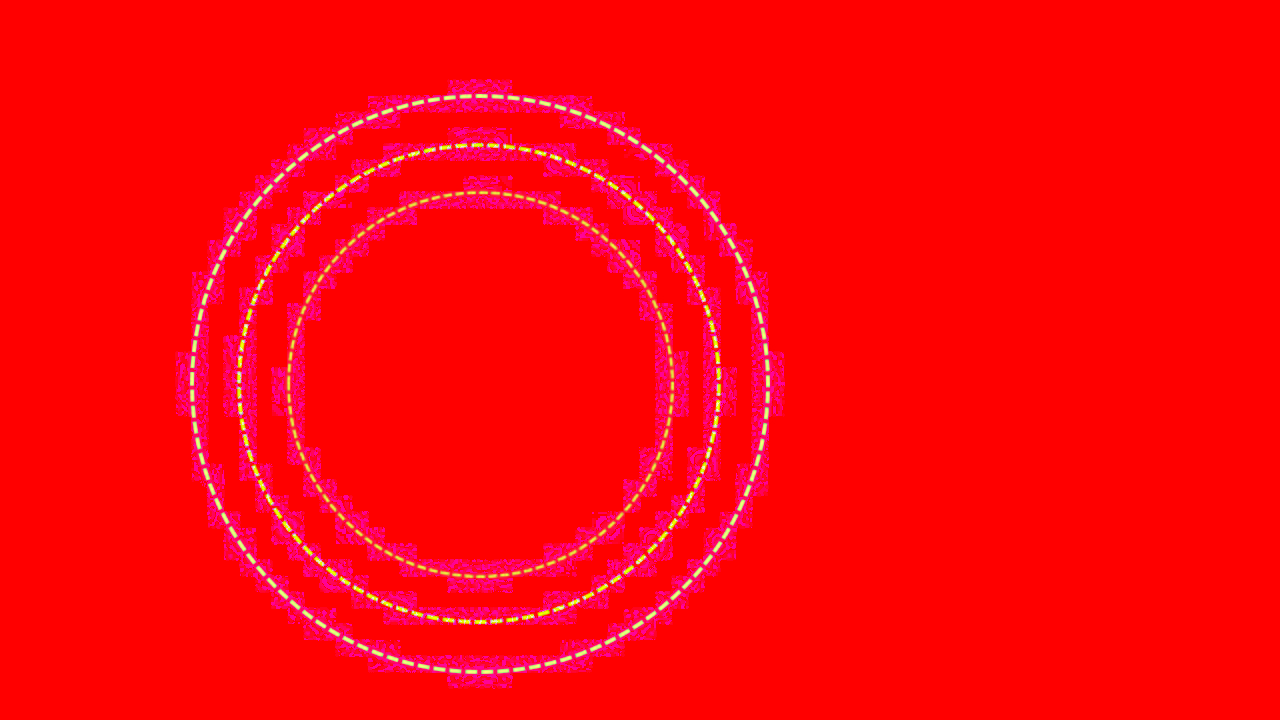

In [0]:
# converting from BGR to HSV color space
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

In [0]:
hsv.shape

(720, 1280, 3)

# Convert RED values to HSV for deciding threshold

In [0]:
red_lower = np.uint8([[[10,0,0 ]]])
red_upper = np.uint8([[[255,0,0 ]]])
hsv_red_lower = cv2.cvtColor(red_lower,cv2.COLOR_BGR2HSV)
hsv_red_upper = cv2.cvtColor(red_upper,cv2.COLOR_BGR2HSV)
print(hsv_red_lower, hsv_red_upper)

[[[120 255  10]]] [[[120 255 255]]]


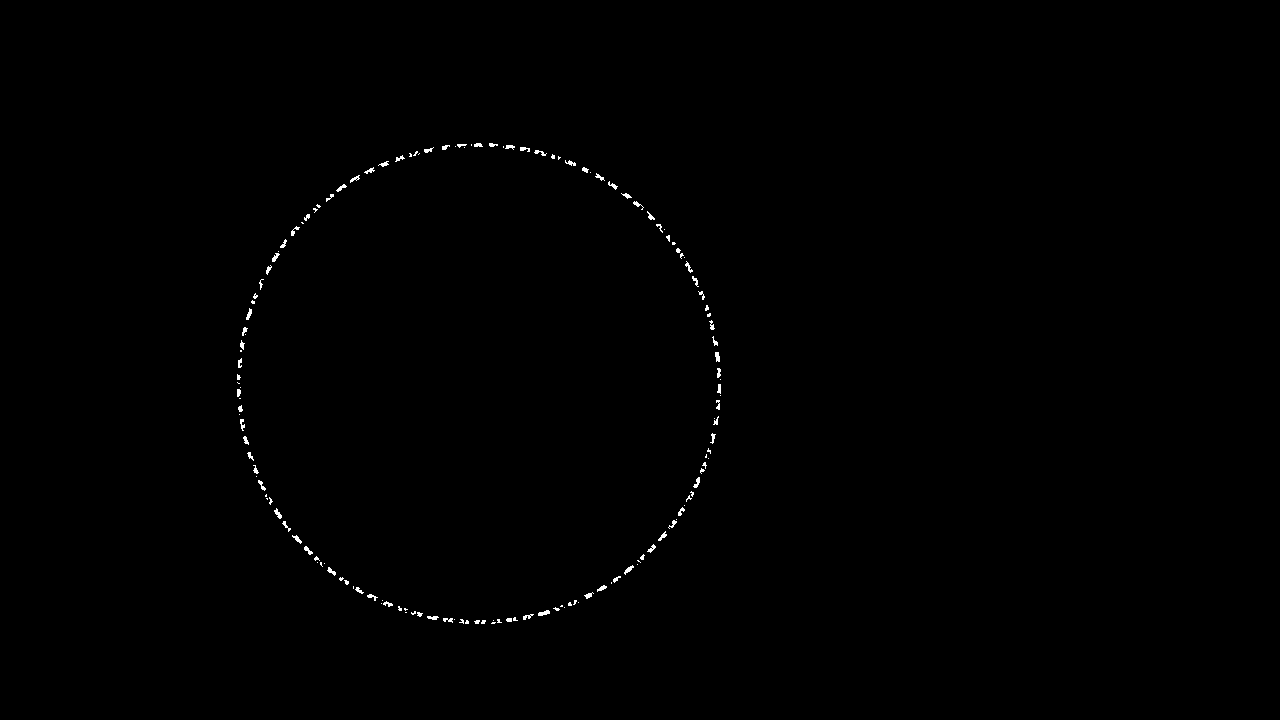

In [0]:
# Range for lower red
# This is HSV Range not BGR range
lower_red = np.array([0,120,70])
upper_red = np.array([10,255,255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)
cv2_imshow(mask1)

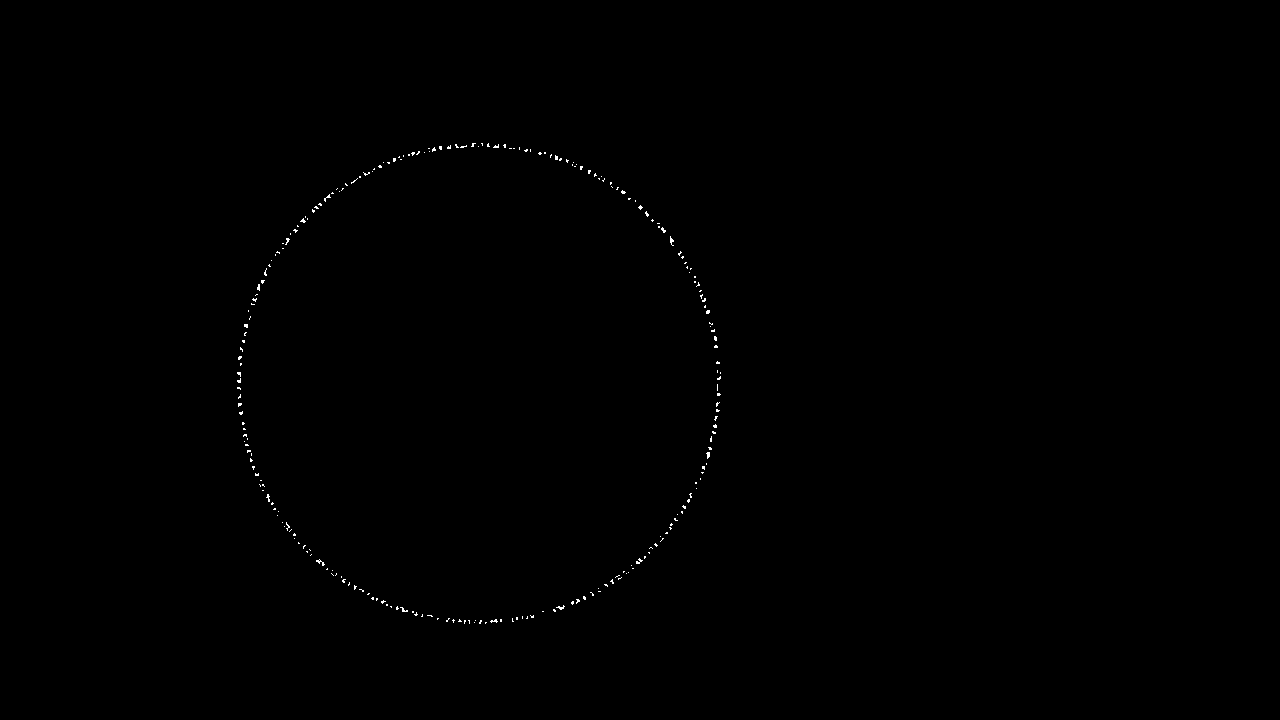

In [0]:
# Range for upper range
lower_red = np.array([170,120,70])
upper_red = np.array([180,255,255])
mask2 = cv2.inRange(hsv,lower_red,upper_red)
cv2_imshow(mask2)

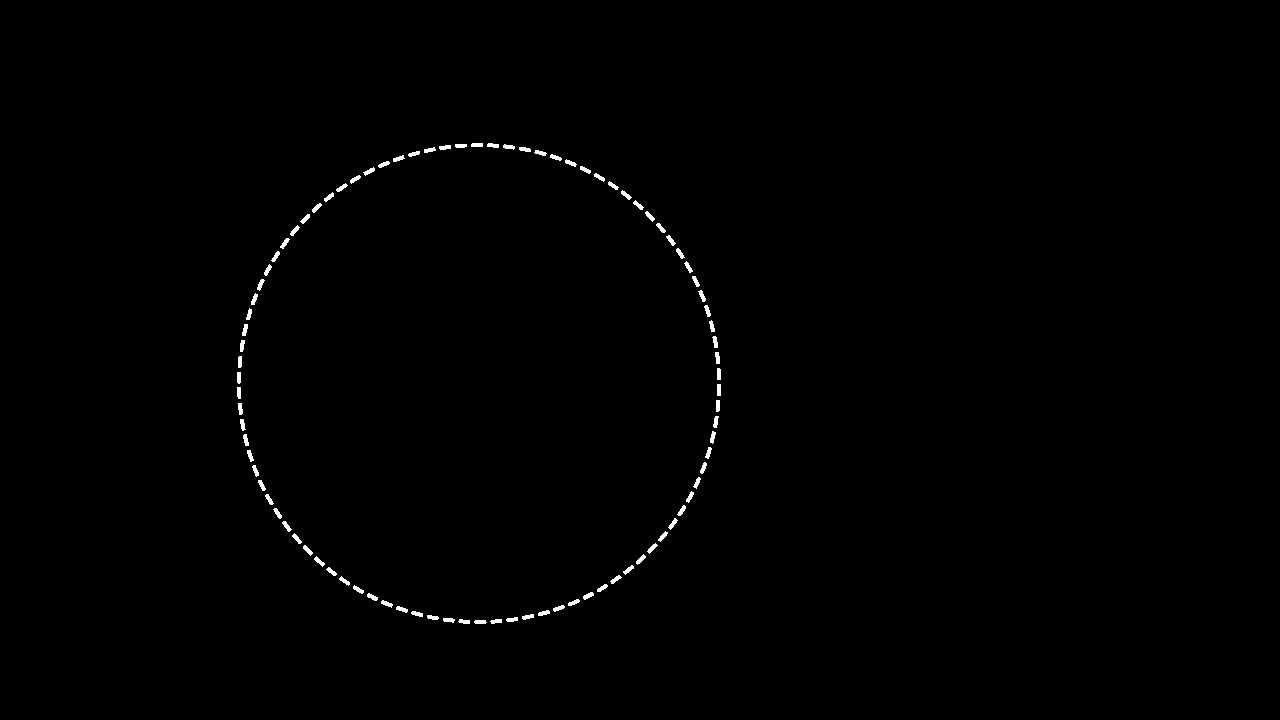

In [0]:
# Generating the final mask to detect red color
mask1 = mask1+mask2
cv2_imshow(mask1)

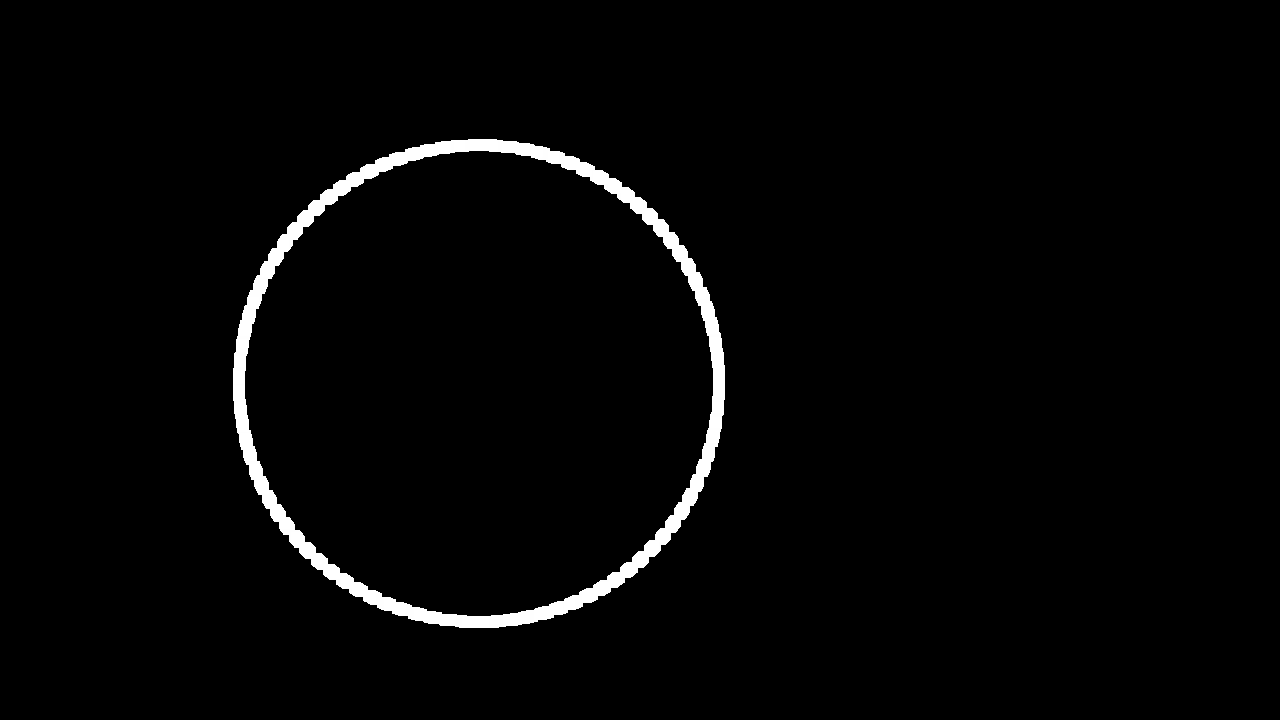

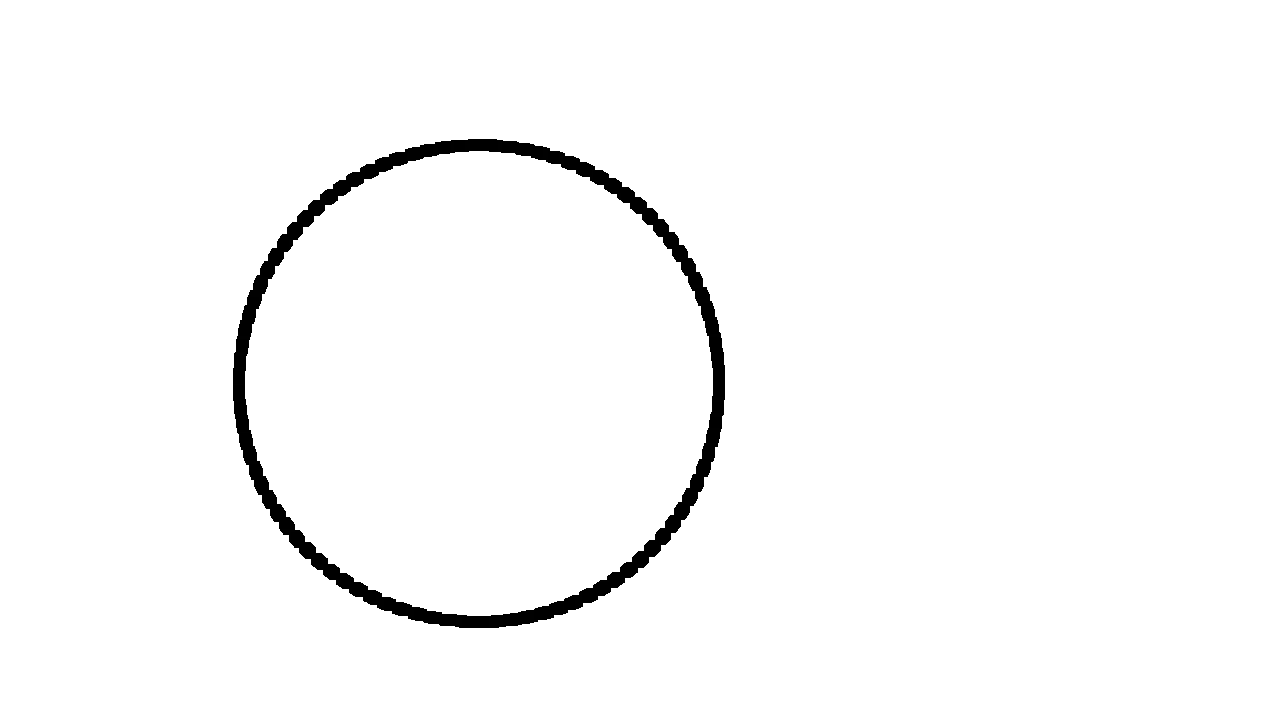

In [0]:
mask1 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
mask1 = cv2.morphologyEx(mask1, cv2.MORPH_DILATE, np.ones((3,3),np.uint8))
cv2_imshow(mask1)
 
#creating an inverted mask to segment out the cloth from the frame
mask2 = cv2.bitwise_not(mask1)
cv2_imshow(mask2)
 
#Segmenting the cloth out of the frame using bitwise and with the inverted mask
res1 = cv2.bitwise_and(img,img,mask=mask2)

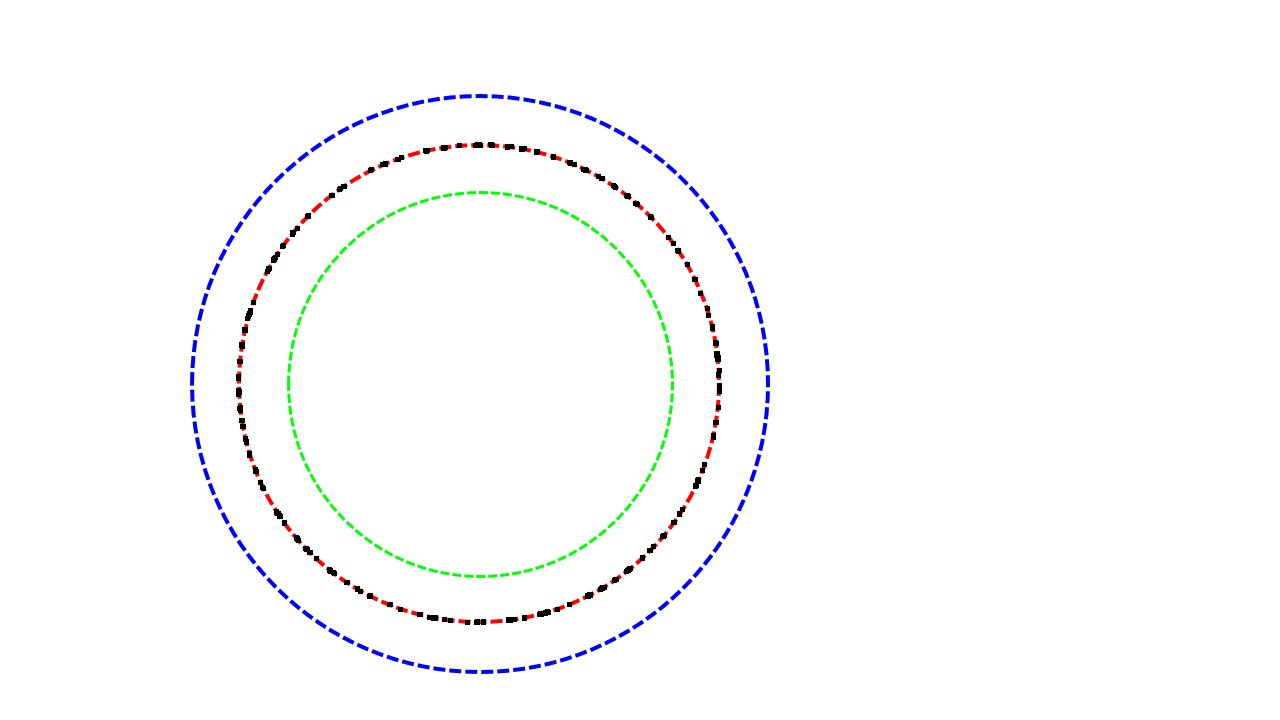

In [0]:
cv2_imshow(res1)